## Part 5. Linear Regression
$$ \def\pr{\hbox{Pr}}
\def\var{\hbox{var}}
\def\cov{\hbox{cov}}
\def\corr{\hbox{corr}}
\def\dmX{\un{\mathcal{X}}}
\def\dmG{\un{\mathcal{G}}}
\def\dmK{\un{\mathcal{K}}}
\def\dmS{\un{\mathcal{S}}}
\def\dmC{\un{\mathcal{C}}}
\def\dmZ{\un{\mathcal{Z}}}
\def\bma{{\mbox{\boldmath $\alpha$}}}
\def\bmb{{\mbox{\boldmath $\beta$}}}
\def\bmu{{\mbox{\boldmath $\mu$}}}
\def\bme{{\mbox{\boldmath $\epsilon$}}}
\def\bmS{{\mbox{\boldmath $\Sigma$}}}
\def\bmL{{\mbox{\boldmath $\Lambda$}}}
\def\bmd{{\mbox{\boldmath $\delta$}}}
\def\bmD{{\mbox{\boldmath $\Delta$}}}
\def\bmG{{\mbox{\boldmath $\Gamma$}}}
\def\bmphi{{\mbox{\boldmath $\phi$}}}
\def\bmPhi{{\mbox{\boldmath $\Phi$}}}
\def\bmpsi{{\mbox{\boldmath $\psi$}}}
\def\bmtheta{{\mbox{\boldmath $\theta$}}}
\def\eq{\begin{equation}}
\def\eeq{\end{equation}}
\def\i{{\bf i}}
\def\un#1{{\bf #1}}$$


Consider a dataset consisting of $n$ pairs

$$\{x(i),y(i)\mid i=1\dots n\}.$$

The statistical model for linear regression is

$$
Y(i)=a + bx(i)+R(i),\quad i=1\dots n.
$$

$Y(i)$ is a random variable representing the $i$th measurement of the dependent
variable and $R(i)$, referred to as the {\it residual error},
is a random variable representing the measurement uncertainty.
The $x(i)$ are exact.

We will assume that the individual measurements are uncorrelated, are normally distributed
and that they all have the same variance:

$$
\cov(R(i),R(i')) = \cases{ \sigma^2 & for $i=i'$\cr 0 & otherwise.}
$$

For the more general case

$$
\var(R(i)) =  \sigma_i^2,
$$

the development is similar, see, e.g., {\it Numerical Recipes}.

The realizations of $R(i)$ are

$$
y(i) - a - bx(i),\quad i=1\dots n,
$$

from which we define a least squares *goodness of fit* function

$$
z(a,b)=\sum_{i=1}^n \left({y(i)-a-bx(i)\over\sigma}\right)^2.
$$

If the residuals $R(i)$ are  normally distributed then $z(a,b)$ is a realization
of a chi-square distributed random variable.

The best values, in the least squares sense, for the parameters $a$ and $b$ are obtained by minimizing $z(a,b)$,
that is, by solving the equations

$$
{\partial z\over\partial a}={\partial z\over\partial b}=0
$$

for $a$ and $b$. The solution is

$$
\hat b = {s_{xy}\over s_{xx}},\quad \hat a=\bar y-\hat b\bar x,
$$

where

$$\eqalign{
s_{xy}&={1\over n}\sum_{i=1}^n (x(i)-\bar x)(y(i)-\bar y)\cr
s_{xx}&={1\over n}\sum_{i=1}^n (x(i)-\bar x)^2\cr
\bar x&={1\over n}\sum_{i=1}^n x(i),\quad \bar y={1\over n}\sum_{i=1}^n y(i).}
$$


The fitted or predicted values are thus

$$
\hat y(i) = \hat a + \hat b x(i).
$$

From the formula for error propagation for uncorrelated errors

$$
\sigma_a^2 = \sum_{i=1}^n \sigma^2\left({\partial a\over \partial y(i)}\right)^2.
$$

the uncertainties in the estimates $\hat a$ and $\hat b$
are given by (next two slides)

$$\eqalign{
\sigma_a^2 &= {\sigma^2\sum x(i)^2\over n\sum x(i)^2-(\sum x(i))^2}\cr
\sigma_b^2 &= {n\sigma^2 \over n\sum x(i)^2-(\sum x(i))^2}\ .}
$$


The formula for error propagation
for uncorrelated errors is

$$
\sigma_a^2 = \sum_{i=1}^n \sigma^2\left({\partial a\over \partial y(i)}\right)^2.
$$

We require the derivative of $a$ with respect to $y(i)$, where

$$
a = \bar y - b\bar x = {1\over n}\sum_i y(i) - {s_{xy}\over s_{xx}}\bar x.
$$

We have

$$
{\partial a\over\partial y(i)} = {1\over n}- {\bar x\over s_{xx}}{\partial s_{xy}\over\partial y(i)}
$$

and

$$\eqalign{
{\partial s_{xy}\over\partial y(i)}&={1\over n}\left(x(i)-\bar x - \sum_j(x(j)-\bar x){\partial \bar y\over\partial y(i)}\right)\cr
&={1\over n}(x(i)-\bar x).}
$$

Hence

$$
{\partial a\over\partial y(i)}={1\over n}\left(1-{\bar x\over  s_{xx}}(x(i)-\bar x)\right)
$$

and

$$
\left({\partial a\over\partial y(i)}\right)^2 ={1\over n^2}\left(1-{2\bar x\over  s_{xx}}(x_i-\bar x)+
{\bar x^2\over  s_{xx}^2}(x(i)-\bar x)^2\right).
$$


Summing over $i$ gives

$$\eqalign{
\sum_i\left({\partial a\over\partial y_i}\right)^2&={1\over n^2}\left(n + 0 
+{\bar x^2\over  s_{xx}^2}n s_{xx}\right)\cr
&= {1\over n}\left({s_{xx}+\bar x^2\over s_{xx}}\right)
={\sum_i x(i)^2\over n^2s_{xx}},}
$$

from which the expression for $\sigma_a^2$ readily follows.

The goodness of fit can be determined by substituting the estimates
$\hat a$ and $\hat b$ into the criterion function, which will then be chi-square
distributed with $n-2$ degrees of freedom. The probability of finding a value
$z=z(\hat a,\hat b)$ {\it or higher} by chance is

$$
Q = 1-P_{\chi^2;n-2}(z).
$$

If $Q<0.001$, one would typically reject the fit as being unsatisfactory.

### Coefficient of determination ($R^2$)

Consider the total variation of the observed variable $y(i)$ about its mean $\bar y$,

$$\eqalign{
\sum_i &(y(i)-\bar y)^2 = \sum_i (y(i)-\hat y(i)+\hat y(i)-\bar y)^2\cr
&= \sum_i(y(i)-\hat y(i))^2 + (\hat y(i)-\bar y)^2 + 2(y(i)-\hat y(i))(\hat y(i)-\bar y)
}
$$

The last term in the summation is

$$
\sum_i 2 r(i)(\hat y(i)-\bar y) = 2\sum_i r(i)\hat y(i) -2\bar y\sum_i r(i) = 0
$$

since the errors are uncorrelated with the predicted values $\hat y(i)$ ( so $\langle r \hat y\rangle = \langle r
\rangle\langle\hat y\rangle$) and have mean 0 (so $\langle r\rangle = 0$).

So we have

$$
\sum_i (y(i)-\bar y)^2 = \sum_i(y(i)-\hat y(i))^2 + \sum_i(\hat y(i)-\bar y)^2
$$

or

$$
1 = {\sum_i(y(i)-\hat y(i))^2\over\sum_i (y(i)-\bar y)^2 } + {\sum_i(\hat y(i)-\bar y)^2\over\sum_i (y(i)-\bar y)^2}
$$

or

$$
1 = {\sum_i(y(i)-\hat y(i))^2\over\sum_i (y(i)-\bar y)^2 } + R^2,
$$

where the *coefficient of determination* $R^2$,

$$
R^2 = {\sum_i(\hat y(i)-\bar y)^2\over\sum_i (y(i)-\bar y)^2}, \quad 0\le R^2\le 1,
$$

is the fraction of the variance in $Y$ that is explained by the regression model.

It is easy to show that

$$
\corr(y,\hat y) = {\sum_i(y(i)-\bar y)(\hat y(i)-\bar y)\over\sqrt{\sum_i(y(i)-\bar y)^2\sum_i(\hat y(i)-\bar y)^2}} = R.
$$

In words: The coefficient of determination is the square of the sample correlation between the observed and predicted values of $y$.

**Exercise 1:** 

Prove this by replacing $(y(i)-\bar y)$ in the numerator by
$(y(i)+\hat y(i)-\hat y(i) +\bar y)$ and expanding.

a = 1.015450, b = 1.968911, R = 0.945603
corr(y,yy) = 0.945603


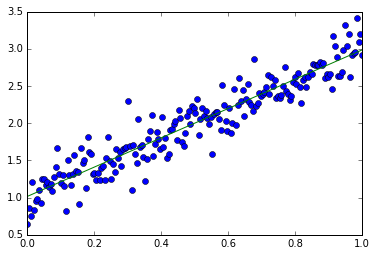

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress, pearsonr

a = 1.0
b = 2.0
n = 200
x = np.linspace(0,1,n)
y = a + b*x + np.random.normal(size = n)*0.2

bb,aa,R,_,_ = linregress(x,y)

yy = aa+bb*x
plt.plot (x,y,'o',x,yy)

print 'a = %f, b = %f, R = %f' % (aa,bb,R)

print 'corr(y,yy) = %f' %pearsonr(y,yy)[0]